In [39]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
import warnings
import statsmodels.api as sm


warnings.filterwarnings('ignore')

In [5]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('SELECT * FROM houseprices', con = engine)

engine.dispose()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [19]:
missing = df.isna().sum().sort_values(ascending = False)
percent = df.isna().mean().sort_values(ascending = False)
data = pd.concat([missing, percent], axis = 1, keys = ['Total', 'Percent'])
data.head(20)

,Total,Percent
poolqc,1453,0.995205
miscfeature,1406,0.963014
alley,1369,0.937671
fence,1179,0.807534
fireplacequ,690,0.472603
lotfrontage,259,0.177397
garagecond,81,0.055479
garagetype,81,0.055479
garageyrblt,81,0.055479
garagefinish,81,0.055479


# straight up no idea what these things are

In [22]:
df_drop = df.drop(columns = 'id')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024713DE7188>,
      dtype=object)

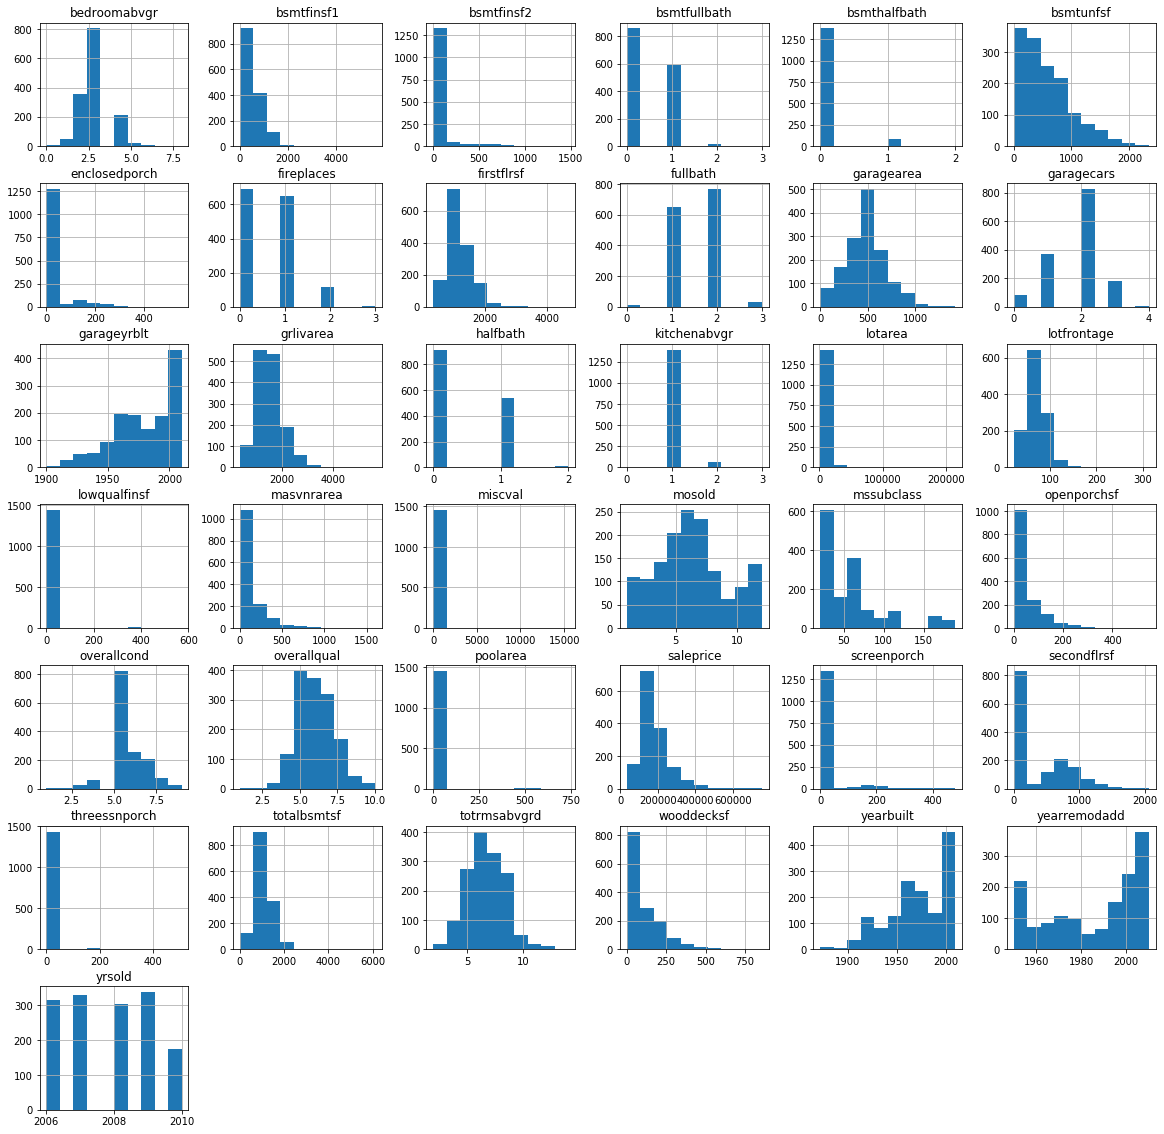

In [25]:
df_drop.hist(figsize = (20, 20))

In [28]:
corred = df_drop.corr().abs()
s = corred.unstack()
s = s.reset_index()

s = s[s['level_0']=='saleprice'].sort_values(by = 0, ascending = False)#
s.head(10)

,level_0,level_1,0
1368,saleprice,saleprice,1.000000
1335,saleprice,overallqual,0.790982
1347,saleprice,grlivarea,0.708624
1357,saleprice,garagecars,0.640409
1358,saleprice,garagearea,0.623431
1343,saleprice,totalbsmtsf,0.613581
1344,saleprice,firstflrsf,0.605852
1350,saleprice,fullbath,0.560664
1354,saleprice,totrmsabvgrd,0.533723
1337,saleprice,yearbuilt,0.522897


In [34]:
X = df_drop[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf']]
y = df['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [35]:
model = LogisticRegression(solver = 'lbfgs',penalty = 'none', max_iter = 42069)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=42069,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
X = sm.add_constant(X)

results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     926.5
Date:                Mon, 06 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:06:37   Log-Likelihood:                -17499.
No. Observations:                1460   AIC:                         3.501e+04
Df Residuals:                    1454   BIC:                         3.504e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.907e+04   4638.450    -21.359      0.000   -1.08e+05      -9e+04
overallqual  2.364e+04   1072.532     22.037      0.000    2.15e+04    2.57e+04
grlivarea      45.3458      2.489     18.218      0.000      40.463      50.228
garagecars   1.454e+04   3022.681      4.812      0.000    8615.034    2.05e+04
garagearea     17.1334     10.468      1.637      0.102      -3.401      37.668
totalbsmtsf    31.5015      2.904     10.848      0.000      25.805      37.198
==============================================================================
Omnibus:                      438.146   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40648.199
Skew:                          -0.338   Prob(JB):                         0.00
Kurtosis:                      28.841   Cond. No.                     9.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""